## Legend

🎯 Objective    
❓ Question  
📝 Task  
☑️ Instructions  
💡 Informations  
💾 Submit your results  

**variable name**  
*field name*  
`python object`

# Reconnaissance de formes par réseaux de neurones artificiels 

This exam assesses the 3rd block of the certification *Reconnaissance de formes par réseaux de neurones artificiels*

💡 It is split into 2 independent challenges:  
- 🖼️ CNN challenge - Image Denoising  
- 🎙️ RNN challenge - Lyrics Detector

# 🖼️ Image Denoising Challenge (2h)

🎯 Design and train a denoising model  
☑️ For a given noisy image $X$, your model should learn to predict the denoised image $y$.

💡 This challenge assesses the following skills:
- C14 Convertir les données entrantes (images et texte par exemple) en données adaptées pour un réseau de neurones (100%)
- C15 Maîtriser les différentes architectures de réseau de neurones : convolutifs pour les images & récurrents pour les séries temporelles et les modèles de traitement automatique du langage (NLP) pour le texte (50%)
- C16 Utiliser un réseau de neurones convolutifs pour étiqueter des images (100%)

## 0. Imports

☑️ Use the cell below to load the packages you use in this challenge

In [1]:
# YOUR CODE HERE

## 1. Load Data

📝 Download the dataset archive  
💡 It contains colored as well as black & white images

In [2]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 42.0M  100 42.0M    0     0  2632k      0  0:00:16  0:00:16 --:--:-- 1695k0:00:02 2060k
total 804
-rw-rw-r-- 1 demange demange    196 juil. 13 09:03 Makefile
drwx------ 2 demange demange  24576 juil.  2  2021 paintings
-rw-rw-r-- 1 demange demange 780058 juil. 13 11:35 paintings_denoising_lyrics_detector.ipynb
-rw-rw-r-- 1 demange demange    442 juil. 13 09:03 README.md
drwxrwxr-x 2 demange demange   4096 juil. 13 09:21 tests


In [3]:
import glob
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Edvard_Munch_15.jpg',
 './paintings/Henri_Matisse_113.jpg',
 './paintings/Albrecht_Duâ\x95\xa0Ãªrer_187.jpg',
 './paintings/Diego_Rivera_10.jpg',
 './paintings/Edgar_Degas_105.jpg',
 './paintings/Mikhail_Vrubel_15.jpg',
 './paintings/Albrecht_Duâ\x95\xa0Ãªrer_301.jpg',
 './paintings/Francisco_Goya_58.jpg',
 './paintings/Joan_Miro_62.jpg',
 './paintings/Michelangelo_12.jpg',
 './paintings/Mikhail_Vrubel_33.jpg',
 './paintings/Edgar_Degas_24.jpg',
 './paintings/Edgar_Degas_127.jpg',
 './paintings/Albrecht_Duâ\x95\xa0Ãªrer_9.jpg',
 './paintings/Amedeo_Modigliani_30.jpg',
 './paintings/Rembrandt_145.jpg',
 './paintings/Mikhail_Vrubel_62.jpg',
 './paintings/Henri_Matisse_31.jpg',
 './paintings/Albrecht_DuÌ\x88rer_63.jpg',
 './paintings/Michelangelo_49.jpg',
 './paintings/Edgar_Degas_257.jpg',
 './paintings/Rembrandt_109.jpg',
 './paintings/Edgar_Degas_394.jpg',
 './paintings/Joan_Miro_84.jpg',
 './paintings/Albrecht_DuÌ\x88rer_295.jpg',
 './paintings/Edgar_Degas_574.jp

📝 Display the 16th image of the **dataset_paths**

☑️    Use the `PIL.Image.open</code>` and `matplotlib.pyplot.imshow` functions.

In [4]:
# Imports PIL module 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
  
# open method used to open different extension image file
#im = Image.open(r"C:\Users\System-Pc\Desktop\ybear.jpg") 
im = Image.open(dataset_paths[15]) 

In [5]:
np.shape(im)

(614, 391, 3)

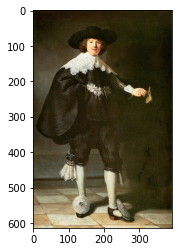

In [6]:
import matplotlib.pyplot as plt
imshow(im)
plt.show()

Look at the image you just displayed:  
📝 Store its shape in `img_shape`  
📝 Store its number of dimensions in `img_dim`

In [7]:
img_shape = np.shape(im)
img_dim = 3

📝 Uncomment the true statements about the image you just displayed

In [8]:
is_portrait = True
is_colored_image = True

💾 **Run the cell below to submit your results**

In [9]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'image_data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing (50min)

*C14 Convertir les données entrantes (images et texte par exemple) en données adaptées pour un réseau de neurones (100%)*

📝 Store all images from the dataset folder in a `list` of `ndarray` called **dataset_images**

💡 It can take a while

In [10]:
dataset_images = []
for i in range(0,len(dataset_paths)):
  dataset_images.append(np.array(Image.open(dataset_paths[i])))

### 2.1 Reshape, Resize, Rescale

Simplify your dataset and convert it to a single `ndarray`

💡 Recall that your dataset contains colored and black & white images

📝 Assign to a `list` **image_dimensions** the two possible number of dimensions for your images 

In [11]:
image_dimensions = []
for i in range(0,len(dataset_images)):
  image_dimensions.append(dataset_images[i].ndim)

📝 Run the cell below to convert all black & white images into colored ones by duplicating the image on three channels  
💡 This is for convenience, so as to have only 3D arrays

In [12]:
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in dataset_images]
set([x.ndim for x in dataset_images])

{3}

📝 Resize your images to make sure they have the same shape  

☑️ Use the method `tensorflow.image.resize`  
☑️ The target size is (height=120 pixels, width=100 pixels)  

In [13]:
import tensorflow as tf
dataset_resized = []
for i in range(0,len(dataset_images)):
  dataset_resized.append(tf.image.resize(dataset_images[i], [120, 100]))

2022-07-13 11:39:03.845809: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-13 11:39:03.845878: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-13 11:39:25.339812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-13 11:39:25.344541: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-13 11:39:25.350516: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.s

📝 Now that all images have the same shape, store them as a `ndarray` in **dataset_resized**  
☑️ Make sure that the size of **dataset_resized** is $(n_{images},\:height,\:width,\:channels)$

In [14]:
dataset_resized = np.array(dataset_resized)

In [15]:
np.shape(dataset_resized)

(498, 120, 100, 3)

📝 Store in **dataset_scaled** your scaled images  
☑️ All scaled values should be between $0$ and $1$

In [16]:
dataset_scaled = dataset_resized/255

### 2.2 Create (X, y) sets

📝 Run the cell below to add random noise to your images

In [17]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(498, 120, 100, 3)

📝 Plot a noisy image alongside the normal one to visualize the impact of the random noise you just added

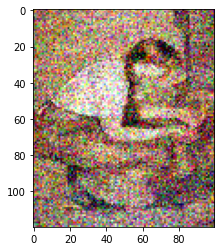

In [18]:
im = dataset_noisy[0]
imshow(im)
plt.show()

📝 **Create your `(X_train, Y_train)`, `(X_test, Y_test)` train and test sets**  
☑️ Use `sklearn`'s `train_test_split` method  
☑️ Your test set should consist of 20% of your total observations, randomly sampled  
💡 Recall your objective: *For a given noisy image $X$, your model should learn to predict the denoised image $y$* to choose $X$ and $y$.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset_noisy,dataset_scaled, test_size = 0.2)

💾 **Run the cell below to submit your results**

In [25]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "image_preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network (1h10)

*C15 Maîtriser les différentes architectures de réseau de neurones : convolutifs pour les images & récurrents pour les séries temporelles et les modèles de traitement automatique du langage (NLP) pour le texte (50%)*  

*C16 Utiliser un réseau de neurones convolutifs pour étiqueter des images (100%)*

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

**If you haven't managed to build your own (X,Y) training sets**  
📝 Copy and paste the code snippet below in a new cell and run it    
💡 It will give you clean `(X_train, Y_train)`, `(X_test, Y_test)` for this section

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

In [26]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)

! rm data_painting_solution.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  136M  100  136M    0     0  2024k      0  0:01:09  0:01:09 --:--:-- 2339k422k      0  0:01:38  0:00:01  0:01:37 1421k


### 3.1 Architecture

📝 Run the cell below that defines the **decoder**

In [27]:
from tensorflow.keras import Sequential, layers
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 30, 25, 8)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 60, 50, 16)       1168      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 120, 100, 32)     4640      
 ranspose)                                                       
                                                                 
 conv2d (Conv2D)             (None, 120, 100, 3)       867       
                                                                 
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


📝 Store in **encoder** a model defined using `Sequential` that plugs correctly with the **decoder** defined above  

☑️ The output of your **encoder**, before flattening, is the same shape as the input of the **decoder**  
☑️ Use a convolutional neural network architecture without transfer learning  
☑️ Keep it simple  
☑️ Print model summary

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

latent_dimension = 6000

encoder = Sequential(name='encoder')
encoder.add(Conv2D(16, (3,3), input_shape=(120, 100, 3), activation='relu'))
encoder.add(MaxPooling2D(2))

encoder.add(Conv2D(32, (3, 3), activation='relu'))
#encoder.add(MaxPooling2D(2))

encoder.add(Conv2D(64, (3, 3), activation='relu'))
encoder.add(MaxPooling2D(2))     

encoder.add(Flatten())
encoder.add(Dense(latent_dimension, activation='sigmoid'))

2022-07-13 11:43:09.027591: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 912384000 exceeds 10% of free system memory.
2022-07-13 11:43:13.408504: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 912384000 exceeds 10% of free system memory.
2022-07-13 11:43:25.639688: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 912384000 exceeds 10% of free system memory.


In [ ]:
encoder.summary()

📝 Run the cell below to construct the full **autoencoder**  
☑️ Look carefully at the summary to make sure your **encoder** fits with the **decoder**

In [ ]:
from tensorflow.keras import Model
x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

### 3.2 Training

📝 Store in **score_baseline** your baseline score  
☑️ Use the Mean Absolute Error  
☑️ Your baseline is the *'dumb'* case where you don't manage to denoise anything at all  

In [ ]:
score_baseline = 1/len(X_train) #Accuracy
score_baseline

📝 Train your **autoencoder**

☑️ Use an appropriate loss for the task at hand  
☑️ Make sure your model does not overfit

💡 You will not be judged by the computing power of your computer, your training should last under 3 minutes

In [ ]:
autoencoder.compile(loss='mse', optimizer='adam')
history_denoising = autoencoder.fit(X_train, Y_train, epochs = 5, batch_size=32, validation_split = 0.3) #

📝 Plot your training and validation loss at each epoch  
☑️ Save your figure as **history_cnn.png** in the **tests/** directory  
☑️ Make sure to keep the code below at the end of the cell that contains your plots  
```python
fig = plt.gcf()
fig.savefig("tests/history_cnn.png")
```

In [ ]:
# Plot below your train/val loss history
font = {'size' : 14}
font_maintitle = {'weight' : 'bold', 'size' : 22}
font_title = {'weight' : 'bold', 'size' : 14}
plt.figure(figsize=(13,9))
plt.plot(history_denoising.history['loss'], label = 'train')
plt.plot(history_denoising.history['val_loss'], label = 'val')
plt.title(f"loss = f(epoch)",**font_title)
plt.xlabel('epoch',**font)
plt.ylabel('loss',**font)
plt.legend()
plt.show()
#ax1.set_ylim(0., 2.2)
#plt.plot.set_title('loss')
#ax1.legend()

# Run this code to save your figure as png in the tests folder
fig = plt.gcf()
fig.savefig("tests/history_cnn.png")

📝 Evaluate your performances on your test set  
☑️ Store in **Y_pred** your denoised test set  
☑️ Store in **score_test** your Mean Absolute Error using **Y_pred** and **Y_test**

In [ ]:
Y_pred = autoencoder.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_pred.flatten(), Y_test.flatten())

📝 Run the cell below to check your result on several image  
💡 We asked for a small model, so don't worry if your prediction seems in significantly lower quality than the original

In [ ]:
from ipywidgets import interact

@interact(index=range(X_test.shape[0]))
def plot(index):
    idx = index

    fig, axs = plt.subplots(1,3, figsize=(10,5))
    axs[0].imshow(Y_test[idx])
    axs[0].set_title("Clean image.")

    axs[1].imshow(X_test[idx])
    axs[1].set_title("Noisy image.")

    axs[2].imshow(Y_pred[idx])
    axs[2].set_title("Prediction.")

📝 Choose one of your predicted denoised image and save it  
☑️ The target path is **tests/image_denoised.png**

In [ ]:
imshow(Y_pred[4])
fig = plt.gcf()
fig.savefig("tests/image_denoised.png")

💾 **Run the cell below to submit your results**

In [ ]:
from nbresult import ChallengeResult
from tensorflow import size

result = ChallengeResult(
    "image_network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()

# 🎙️ Lyrics detector Challenge (1h)

🎯 Design and train a lyrics classifier  
☑️ For a given verse $X$, your model should learn to predict the artist $y$  
💡 For this challenge the data processing is given

💡 This challenge assesses the following skills:
- C15 Maîtriser les différentes architectures de réseau de neurones : convolutifs pour les images & récurrents pour les séries temporelles et les modèles de traitement automatique du langage (NLP) pour le texte (50%)
- C17 Utiliser un réseau de neurones pour comprendre l'intention d'une phrase en langage naturel (100%)

## 0. Imports

☑️ Use the cell below to load the packages you use in this challenge  
💡 All packages used in the (given) preprocessing are imported here, make sure to not delete them

In [2]:
# Arrays
import numpy as np
import pandas as pd

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Processing
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder

# Model
from sklearn.model_selection import train_test_split

## 1. Load Data (given)  

📝 Let's download the dataset  
☑️ Keep the original, unaltered data in **raw_data** and work with its copy, **data**  
💡 It contains around 4k verses of lyrics from 3 different artists (Drake, Ed Sheeran and Kanye West)

In [3]:
raw_data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/verses.csv")
data = raw_data.copy()
data

,artist,verse
0,Drake,"Ayy, woah Ayy, ayy Yeah"
1,Drake,I'm makin' a change today The liquor been taki...
2,Drake,"I can't just be with you and only you Yeah, I ..."
3,Drake,"Well, summer, all I did was rest, okay? And Ne..."
4,Drake,I'm makin' a change today The liquor been taki...
...,...,...
3970,Kanye West,"Dame was like, ""Yo you got a deal with Capitol..."
3971,Kanye West,"Then one day I just went ahead and played it, ..."
3972,Kanye West,"""I ain't gonna front, it's kinda hot."""
3973,Kanye West,Like they still weren't looking at me like a r...


📝  Look at the 19th verse  
💡 Notice the unicode characters, for instance `\u2005`

In [4]:
raw_data.verse[18]

'Ayy, yeah Pipe this shit up and I turn this shit up When I was down, I\u2005was\u2005down Now them diamonds\u2005for fun like damn Ayy, yeah'

📝 Run the cell below to decode unicode characters  
💡 We provide you with a method using [`unidecode.unidecode()`](https://pypi.org/project/Unidecode/) to do so  
☑️ Install the `unidecode` package if needed

In [8]:
from unidecode import unidecode
data["verse"] = data["verse"].map(unidecode)
data.verse[18]

'Ayy, yeah Pipe this shit up and I turn this shit up When I was down, I was down Now them diamonds for fun like damn Ayy, yeah'

📝 Run the cell below to drop duplicated verses    
💡 Observing duplicates happens quite often with music lyrics  

In [9]:
# Number of duplicated verses
data.duplicated().sum()

944

In [10]:
# Drop duplicated verses
data.drop_duplicates(inplace=True)

# Check again to ensure there are 0 duplicates remaining
data.duplicated().sum()

0

💾 **Run the cell below to submit your results**

In [11]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'lyrics_data_loading',
    shape=data.shape,
    verses=data.verse[:50]
)

result.write()

## 2. Processing (given)

☑️ For this section, read carefully before running the cells, you will need to understand the processing to design an train your model

📝 Transform the list of strings (verses) into a list of word sequences  
💡 These sequences of words are stored in a new column *seq* in your **data**  
💡 We use `tensorflow.keras.preprocessing.text.text_to_word_sequence` to achieve this

In [12]:
data["seq"] = [text_to_word_sequence(verse) for verse in data["verse"]]

📝 Check the distribution of sequences lengths  
💡 From this we choose to limit ourself to 300 words per verse

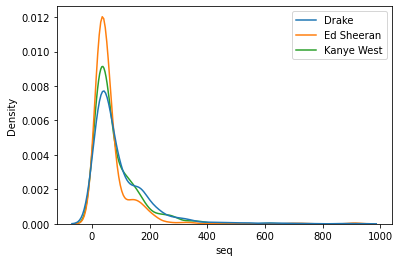

In [13]:
sns.kdeplot(x=data["seq"].map(lambda l: len(l)),
            hue=[x for x in data["artist"]],
            common_norm=False);

📝 Truncate each sequences to keep only the first `300` words

In [14]:
data["seq"] = data["seq"].map(lambda x: x[:300])

📝 Train a `gensim.models.Word2Vec` model on your dataset
- You want to embed each word into vectors of dimension `100`
- No words should be excluded
- Give Word2Vec at least 50 epochs to be sure it converges
- Store these lists of vectors in a new column `data["embed"]`

In [15]:
from gensim.models import Word2Vec

word2vec = Word2Vec(
    sentences=data["seq"],
    vector_size=100,
    window=5,
    min_count=0,
    epochs=50, 
)

In [16]:
data['embed'] = [[word2vec.wv[word] for word in verse] 
                 for verse in data['seq']]
data

,artist,verse,seq,embed
0,Drake,"Ayy, woah Ayy, ayy Yeah","[ayy, woah, ayy, ayy, yeah]","[[-0.08980069, 1.4156375, -0.87224454, -1.3894..."
1,Drake,I'm makin' a change today The liquor been taki...,"[i'm, makin', a, change, today, the, liquor, b...","[[0.7934612, -2.8005424, -1.8902279, 1.9850233..."
2,Drake,"I can't just be with you and only you Yeah, I ...","[i, can't, just, be, with, you, and, only, you...","[[0.530867, 0.104570195, 0.35782775, -0.707413..."
3,Drake,"Well, summer, all I did was rest, okay? And Ne...","[well, summer, all, i, did, was, rest, okay, a...","[[-1.1186384, -0.16213237, -1.0968767, 1.74986..."
4,Drake,I'm makin' a change today The liquor been taki...,"[i'm, makin', a, change, today, the, liquor, b...","[[0.7934612, -2.8005424, -1.8902279, 1.9850233..."
...,...,...,...,...
3970,Kanye West,"Dame was like, ""Yo you got a deal with Capitol...","[dame, was, like, yo, you, got, a, deal, with,...","[[0.542471, 0.37421998, 0.7749202, 0.36682132,..."
3971,Kanye West,"Then one day I just went ahead and played it, ...","[then, one, day, i, just, went, ahead, and, pl...","[[1.0814415, 0.8764531, -0.006815861, -1.81089..."
3972,Kanye West,"""I ain't gonna front, it's kinda hot.""","[i, ain't, gonna, front, it's, kinda, hot]","[[0.530867, 0.104570195, 0.35782775, -0.707413..."
3973,Kanye West,Like they still weren't looking at me like a r...,"[like, they, still, weren't, looking, at, me, ...","[[-2.1082494, 2.5489874, 0.98314595, -0.310689..."


📝  Create your a `ndarray` **X** of shape $(number\_of\_verses,\ maximum\_sequence\_length,\ embedding\_size)$

💡 Keep 300 words per verse (verses shorter than 300 are padded with zeros at the end) 

In [17]:
X = pad_sequences(
    data["embed"],
    dtype='float',
    padding='post'
)
X.shape

(3031, 300, 100)

📝  Create your a `ndarray` **y** of shape $(number\_of\_verses,\ number\_of\_classes)$ that contains the one-hot encoded list of labels 

In [18]:
y = OneHotEncoder().fit_transform(data[['artist']]).toarray()
y.shape

(3031, 3)

📝 Split the dataset to create both the train and test sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

💾 **Run the cell below to submit your results**

In [20]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'lyrics_data_preprocessing',
    n_zeros = np.sum(X == 0),
    X_shape = X.shape,
    y_shape = y.shape,
)

result.write()

## 3. Recurrent Neural Network

*C15 Maîtriser les différentes architectures de réseau de neurones : convolutifs pour les images & récurrents pour les séries temporelles et les modèles de traitement automatique du langage (NLP) pour le texte (50%)*  

*C17 Utiliser un réseau de neurones pour comprendre l'intention d'une phrase en langage naturel (100%)*

📝 Store in **score_baseline** your baseline score  
☑️ Use the Accuracy  
☑️ Your baseline is the 'dumb' case where you predict only the most frequent artist

In [25]:
score_baseline = 1/3

📝 Store in **model** using `Sequential`
❓ **Create a RNN architecture to predict the artists `y`  given verses `X`** :

☑️ Use a recurrent neural network architecture  
☑️ Keep it simple: use only one LSTM or GRU layer  
☑️ Limit yourself to one *hidden* dense layer between the LSTM/GRU layer and the output layer  
☑️ Don't forget to take care of the fake "zeros" added when padding

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten

normalizer = Normalization()
model = Sequential()
model.add(normalizer)

model.add(LSTM(units=20, activation='tanh'))
model.add(LSTM(units=20, activation='tanh'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
# To finish

📝 Train your **model**

☑️ Use an appropriate loss for the task at hand  
☑️ Make sure your model does not overfit

💡 You will not be judged by the computing power of your computer, your training should last under 3 minutes

In [ ]:
# YOUR CODE HERE

📝 Plot your training and validation loss at each epoch  
☑️ Save your figure as **history_rnn.png** in the **tests/** directory  
☑️ Make sure to keep the code below at the end of the cell that contains your plots  
```python
fig = plt.gcf()
fig.savefig("tests/history_rnn.png")
```

In [ ]:
# Plot below your train/val loss history
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history_rnn.png")

📝 Evaluate your performances on your test set  
☑️ Use the `evaluate` method a `Sequential` model to do so  
☑️ Store the resulting accuracy score in **score_test**

In [ ]:
# YOUR CODE HERE

💾 **Run the cell below to submit your results**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "lyrics_network",
    loss = model.loss,
    input_shape = list(model.input.shape),
    layer_names = [layer.name for layer in model.layers],
    final_activation = model.layers[-1].activation.__wrapped__._keras_api_names[0],
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()